In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "transactions_.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

In [3]:
df.head()

,TransactionID,TransactionCode,ClientID,ClientFullName,AgentID,AgentFullName,TransactionDate,Amount,Currency,OriginalCountry,DestinationCountry,Fee,TransactionStatus,StatusDate,Category,Icon,IsFraudulent
0,1,TXN-HKC0XMHR,75,Travis Santos,13,Karen Gomez,2022-01-23T17:32:06,9504.30,EUR,Paraguay,Senegal,33.97,Cancelled,2022-01-03T01:51:47,Other,https://picsum.photos/488/689,0
1,2,TXN-F4T2715R,16,Brandy Lewis,18,Robert Allen,2024-12-26T11:16:00,266.69,INR,Malawi,Austria,7.45,Pending,2021-01-21T09:33:37,Other,https://placekitten.com/57/38,0
2,3,TXN-Z8XUSQ4Y,46,Richard Eaton,22,Shari Robinson,2023-07-12T03:53:21,7970.26,USD,Honduras,Afghanistan,35.04,Completed,2020-03-07T12:03:59,Receive,https://placekitten.com/747/614,0
3,4,TXN-74XQY0DC,83,Carla Bean,19,John Lawrence,2023-05-08T10:42:52,4221.45,AUD,Russian Federation,Egypt,2.39,Pending,2021-08-16T04:26:40,Other,https://placekitten.com/69/237,1
4,5,TXN-6MQCJKWF,100,Michele Sweeney,19,Rebecca Schwartz,2023-10-31T16:38:52,3131.83,USD,United States Virgin Islands,Holy See (Vatican City State),33.24,Pending,2020-07-28T03:13:33,Receive,https://placekitten.com/456/302,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TransactionID       1000 non-null   int64  
 1   TransactionCode     1000 non-null   object 
 2   ClientID            1000 non-null   int64  
 3   ClientFullName      1000 non-null   object 
 4   AgentID             1000 non-null   int64  
 5   AgentFullName       1000 non-null   object 
 6   TransactionDate     1000 non-null   object 
 7   Amount              1000 non-null   float64
 8   Currency            1000 non-null   object 
 9   OriginalCountry     1000 non-null   object 
 10  DestinationCountry  1000 non-null   object 
 11  Fee                 1000 non-null   float64
 12  TransactionStatus   1000 non-null   object 
 13  StatusDate          1000 non-null   object 
 14  Category            1000 non-null   object 
 15  Icon                1000 non-null   object 
 16  IsFraud

In [5]:
df.describe()

,TransactionID,ClientID,AgentID,Amount,Fee,IsFraudulent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,49.854000,13.068000,5008.078400,25.38917,0.496000
std,288.819436,28.602846,7.104777,2897.568778,14.30695,0.500234
min,1.000000,1.000000,1.000000,10.180000,1.00000,0.000000
25%,250.750000,26.000000,7.000000,2475.497500,12.31750,0.000000
50%,500.500000,49.000000,13.000000,4930.845000,25.57500,0.000000
75%,750.250000,74.000000,19.000000,7544.377500,38.21250,1.000000
max,1000.000000,100.000000,25.000000,9984.760000,49.69000,1.000000


In [14]:

# Calculate variance and standard deviation
amount_variance = df["Amount"].var()
fee_variance = df["Fee"].var()
fraud_variance = df["IsFraudulent"].var()
amount_std = np.sqrt(amount_variance)
fee_std = np.sqrt(fee_variance)
fraud_std = np.sqrt(fraud_variance)

amount_mean = df["Amount"].mean()
fee_mean = df["Fee"].mean()
fraud_mean = df["IsFraudulent"].mean()

# Print variance and standard deviation results
print(f"Variance of Transaction Amounts: {amount_variance:.2f}")
print(f"Variance of Transaction Fees: {fee_variance:.2f}")
print(f"Variance of Fraudulent Transactions: {fraud_variance:.2f}")

print(f"Standard Deviation of Transaction Amounts: {amount_std:.2f}")
print(f"Standard Deviation of Transaction Fees: {fee_std:.2f}")
print(f"Standard Deviation of Fraudulent Transactions: {fraud_std:.2f}")


print(f"Mean of Transaction Amounts: {amount_mean:.2f}")
print(f"Mean of Transaction Fees: {fee_mean:.2f}")
print(f"Mean of Fraudulent Transactions: {fraud_mean:.2f}")

Variance of Transaction Amounts: 8395904.82
Variance of Transaction Fees: 204.69
Variance of Fraudulent Transactions: 0.25
Standard Deviation of Transaction Amounts: 2897.57
Standard Deviation of Transaction Fees: 14.31
Standard Deviation of Fraudulent Transactions: 0.50
Mean of Transaction Amounts: 5008.08
Mean of Transaction Fees: 25.39
Mean of Fraudulent Transactions: 0.50


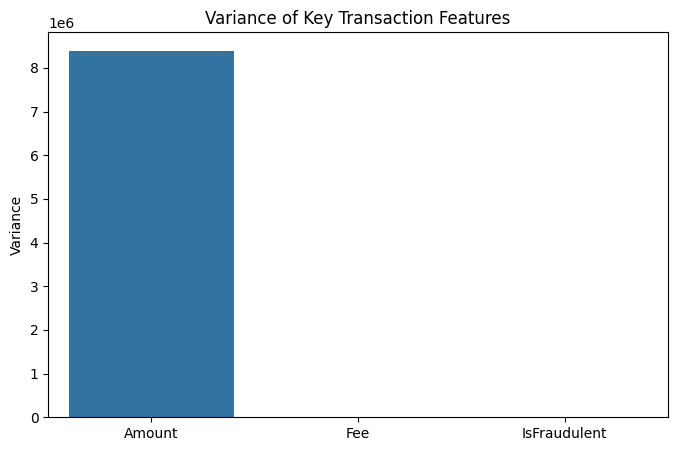

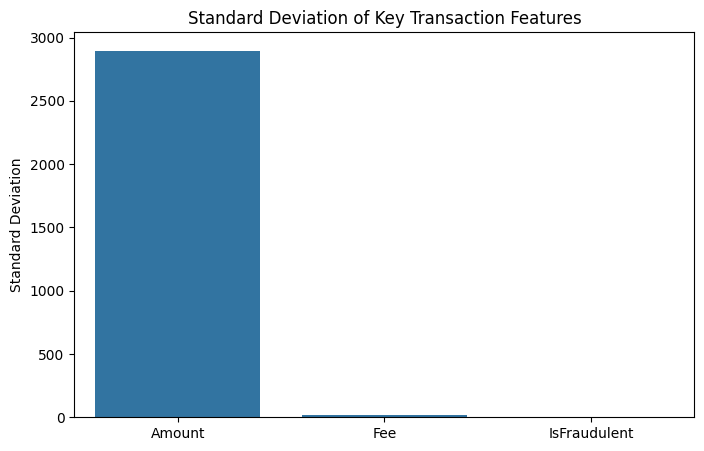

In [8]:
# Visualization - Variance and Standard Deviation Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=["Amount", "Fee", "IsFraudulent"], y=[amount_variance, fee_variance, fraud_variance])
plt.ylabel("Variance")
plt.title("Variance of Key Transaction Features")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=["Amount", "Fee", "IsFraudulent"], y=[amount_std, fee_std, fraud_std])
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Key Transaction Features")
plt.show()


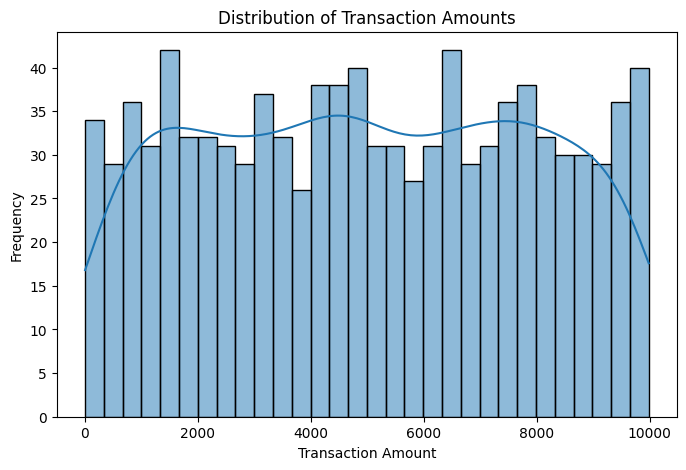

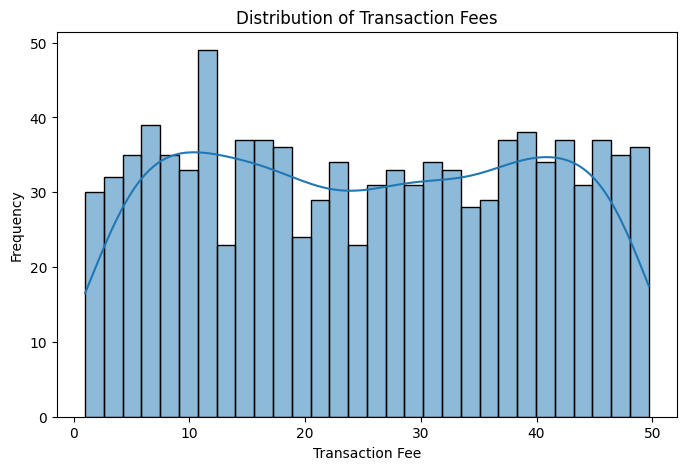

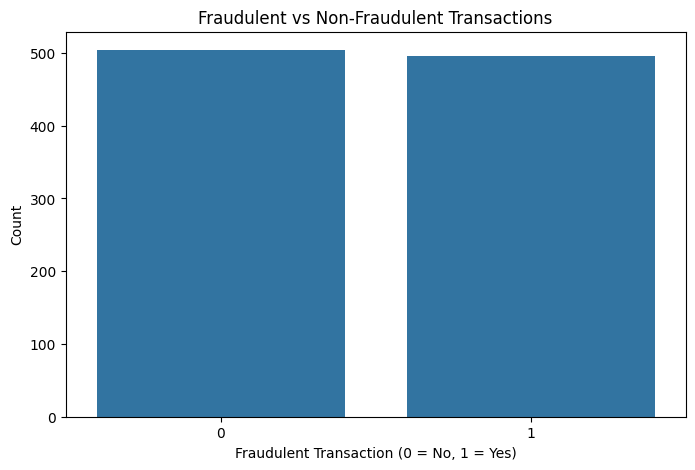

In [9]:
# Histograms to visualize distributions
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount"], bins=30, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["Fee"], bins=30, kde=True)
plt.xlabel("Transaction Fee")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Fees")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=df["IsFraudulent"])
plt.xlabel("Fraudulent Transaction (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.show()


In [10]:

# Detect outliers using IQR (Interquartile Range) method
Q1 = df[["Amount", "Fee"]].quantile(0.25)
Q3 = df[["Amount", "Fee"]].quantile(0.75)
IQR = Q3 - Q1

outliers = df[((df["Amount"] < (Q1["Amount"] - 1.5 * IQR["Amount"])) | (df["Amount"] > (Q3["Amount"] + 1.5 * IQR["Amount"])))
             | ((df["Fee"] < (Q1["Fee"] - 1.5 * IQR["Fee"])) | (df["Fee"] > (Q3["Fee"] + 1.5 * IQR["Fee"])))]
             
# Show number of outliers detected
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 0


Text(0, 0.5, 'Transaction Amount ($)')

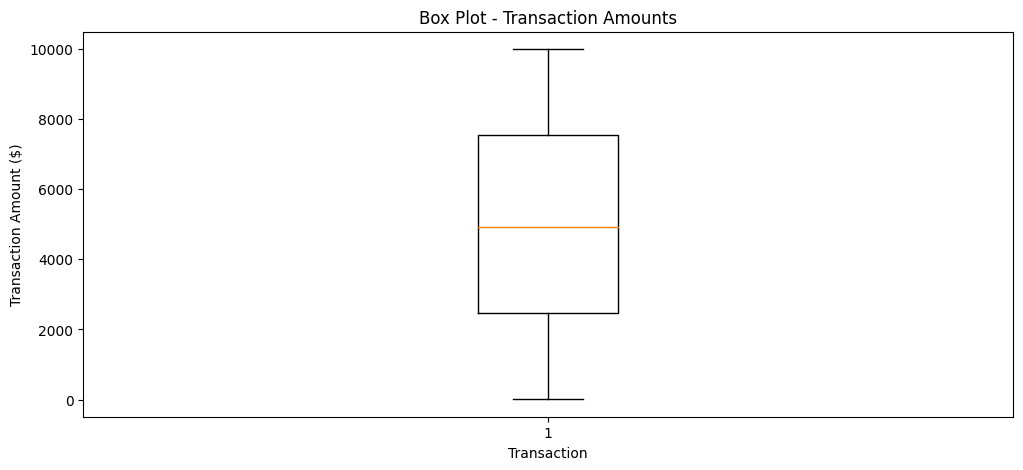

In [13]:
# Create Box Plot
plt.figure(figsize=(12, 5))

# Box Plot
#plt.subplot(1, 2, 1)
plt.boxplot(df["Amount"])
plt.title('Box Plot - Transaction Amounts')
plt.xlabel("Transaction")
plt.ylabel('Transaction Amount ($)')